In [261]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
years = range(2000,2015)

pieces = []
columns = ['When Reported','Offense Code','location']

for year in years:
    path = 'C:/Users/flunk_000/Desktop/CalPoly/StakeOut/%d.csv' % year
    frame = pd.read_csv(path, names=columns, header = True)

    pieces.append(frame)

crimeData = pd.concat(pieces, ignore_index=True)

#Total Crime/Day

In [4]:
for i in range(len(crimeData['location'])):
    if crimeData['location'][i] == 'LZ1':
        crimeData['location'][i]=1
    if crimeData['location'][i] =='LZ2':
        crimeData['location'][i]=2
    if crimeData['location'][i]=='LZ3':
        crimeData['location'][i]=3

In [5]:
crimeData['When Reported'] = [datetime.datetime.strptime(date, '%H:%M:%S %m/%d/%Y') for date in crimeData['When Reported']]

In [6]:
crimeData['When Reported'] = sorted(crimeData['When Reported'])

In [7]:
ts = pd.Series(crimeData['location'],index=crimeData['When Reported'])
ts[0:] = 1

In [8]:
byDay = ts.resample('D',how='sum')

In [9]:
mean=round(np.mean(byDay),2)
std=round(np.std(byDay),2)

## Total Crime: Visualization

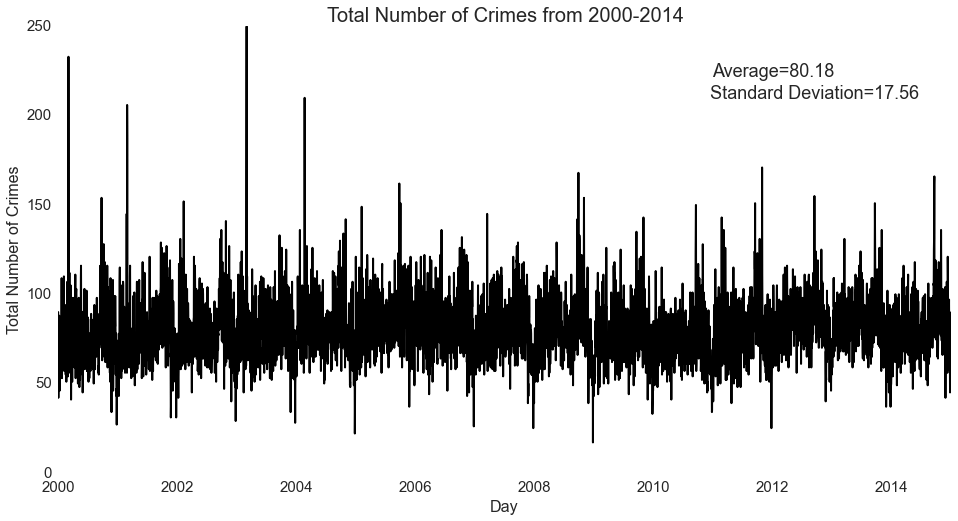

In [10]:
figure = plt.figure(figsize=(16,8))
TSPlot = byDay.plot(linewidth=2, c='black')

TSPlot.set_ylabel('Total Number of Crimes', fontsize=16)
TSPlot.set_xlabel('Day',fontsize=16)
TSPlot.set_title('Total Number of Crimes from 2000-2014',fontsize=20)
plt.tick_params(axis='both', labelsize=15)

#### ADD STATISTICS TEXT####
TSPlot.text(0.8, 0.9,'Average=%.2f' %mean, ha='center', va='center', transform=TSPlot.transAxes, fontsize = 18)
TSPlot.text(0.8465, 0.85,'Standard Deviation=%.2f' %std, ha='center', va='center', transform=TSPlot.transAxes, fontsize = 18);

##Total Crime: Harmonic Model 

In [115]:
print(len(byDay[0:2048]));
print(len(byDay[1383:3431]));
print(len(byDay[2048:4096]));
print(len(byDay[3431:5479]));

2048
2048
2048
2048


In [152]:
ffts = {'1stWindow':np.fft.fft(byDay[0:2048]),
        '2ndWindow':np.fft.fft(byDay[1383:3431]),
        '3rdWindow':np.fft.fft(byDay[2048:4096]),
        '4thWindow':np.fft.fft(byDay[3431:5479])}

In [153]:
harmonicDF = pd.DataFrame(ffts)

In [379]:
def imabs(complexNum):
    return 2*abs(complexNum)/float(2048)

def imarg(complexNum):
    return math.atan2(complexNum.imag,complexNum.real)

def sine_wave(time,amp,freq,phi,damp):
    return ((math.exp(-1*damp*time))*
            (amp*math.sin(2*math.pi*freq*time-phi)))

In [399]:
harmonicDF['peakAmp1']= harmonicDF.apply(lambda row: imabs(row['1stWindow']), axis=1)
harmonicDF['peakAmp2']= harmonicDF.apply(lambda row: imabs(row['2ndWindow']), axis=1)
harmonicDF['peakAmp3']= harmonicDF.apply(lambda row: imabs(row['3rdWindow']), axis=1)
harmonicDF['peakAmp4']= harmonicDF.apply(lambda row: imabs(row['4thWindow']), axis=1)

In [400]:
harmonicDF['peakAmp1'][0] = 0
harmonicDF['peakAmp1'][1023] = abs(harmonicDF['1stWindow'][1023])

harmonicDF['peakAmp2'][0] = 0
harmonicDF['peakAmp2'][1023] = abs(harmonicDF['2ndWindow'][1023])

harmonicDF['peakAmp3'][0] = 0
harmonicDF['peakAmp3'][1023] = abs(harmonicDF['3rdWindow'][1023])

harmonicDF['peakAmp4'][0] = 0
harmonicDF['peakAmp4'][1023] = abs(harmonicDF['4thWindow'][1023])

In [192]:
harmonicDF['k'] = np.arange(len(harmonicDF))

In [193]:
harmonicDF['freq'] = harmonicDF['k']/(2048)

In [599]:
harmonicDF['phase(rad)1']= harmonicDF.apply(lambda row: imarg(row['1stWindow']), axis=1)
harmonicDF['phase(rad)2']= harmonicDF.apply(lambda row: imarg(row['2ndWindow']), axis=1)
harmonicDF['phase(rad)3']= harmonicDF.apply(lambda row: imarg(row['3rdWindow']), axis=1)
harmonicDF['phase(rad)4']= harmonicDF.apply(lambda row: imarg(row['4thWindow']), axis=1)

In [600]:
peakDF = harmonicDF.filter(regex='peakAmp1|peakAmp2|peakAmp3|peakAmp4')

In [402]:
peakDFsorted = peakDF.sort(['peakAmp1'],ascending=False);

In [403]:
amp1st = peakDFsorted['peakAmp1'][1:13]

In [404]:
peakDFsorted = peakDF.sort(['peakAmp2'],ascending=False);
amp2nd = peakDFsorted['peakAmp2'][1:13]

In [405]:
peakDFsorted = peakDF.sort(['peakAmp3'],ascending=False);
amp3rd = peakDFsorted['peakAmp3'][1:13]

In [407]:
peakDFsorted = peakDF.sort(['peakAmp4'],ascending=False);
amp4th = peakDFsorted['peakAmp4'][1:13]

In [601]:
print('1st',amp1st);
print('2nd',amp2nd);
print('3rd',amp3rd);
print('4th',amp4th);

('1st', 1755    9.307981
293     9.307981
292     6.556202
1756    6.556202
11      5.562952
2037    5.562952
17      5.431810
2031    5.431810
1463    3.296826
585     3.296826
1754    2.827156
294     2.827156
Name: peakAmp1, dtype: float64)
('2nd', 1755    8.231037
293     8.231037
11      6.074197
2037    6.074197
292     5.624539
1756    5.624539
17      4.694900
2031    4.694900
1463    3.616220
585     3.616220
6       2.975409
2042    2.975409
Name: peakAmp2, dtype: float64)
('3rd', 1755    7.725407
293     7.725407
11      6.105436
2037    6.105436
1756    5.898057
292     5.898057
2031    4.709566
17      4.709566
2042    4.028150
6       4.028150
585     3.394375
1463    3.394375
Name: peakAmp3, dtype: float64)
('4th', 1755    6.470915
293     6.470915
11      5.788553
2037    5.788553
2047    4.710420
1       4.710420
2031    4.361584
17      4.361584
292     3.626862
1756    3.626862
2042    3.487934
6       3.487934
Name: peakAmp4, dtype: float64)


In [419]:
index = pd.date_range('2000-01-01', periods=5479, freq='D')
waveDF = pd.DataFrame(mdates.date2num(index), columns=['time'])
waveDF['When Reported'] = index

In [602]:
indices = [293,11,292,17,585,6]
waves = [1,2,3,4]
k=1

for i in range(len(waves)):
    for j in range(6):
        amp = harmonicDF['peakAmp%d' %int(i+1)][indices[j]]
        freq = harmonicDF['freq'][indices[j]]
        phi = harmonicDF['phase(rad)%d' %int(i+1)][indices[j]]
        damp=0
    
        waveDF['SineValues%d' %int(k)]= waveDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi,damp),axis=1)
        k+=1

#### Adjust for index discrepencies

In [603]:
amp = harmonicDF['peakAmp1'][294]
freq = harmonicDF['freq'][294]
phi = harmonicDF['phase(rad)1'][294]
damp=0
waveDF['SineValues6']= waveDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi,damp),axis=1)

In [604]:
amp = harmonicDF['peakAmp4'][1]
freq = harmonicDF['freq'][1]
phi = harmonicDF['phase(rad)4'][1]
damp=0
waveDF['SineValues23']= waveDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi,damp),axis=1)

In [606]:
interval1 = waveDF.filter(regex='SineValues6|SineValues5|SineValues4')
interval2 = waveDF.filter(regex='SineValues7|SineValues8|SineValues9|SineValues10|SineValues11|SineValues12')
interval3 = waveDF.filter(regex='SineValues13|SineValues14|SineValues15|SineValues16|SineValues17|SineValues18')
interval4 = waveDF.filter(regex='SineValues19|SineValues20|SineValues21|SineValues22|SineValues23|SineValues24')

In [607]:
interval1['SineValues1']=waveDF['SineValues1']
interval1['SineValues2']=waveDF['SineValues2']
interval1['SineValues3']=waveDF['SineValues3']

In [738]:
waveDF['agWave'] = (interval2.sum(axis=1)+interval3.sum(axis=1)+interval1.sum(axis=1)+interval4.sum(axis=1))

In [739]:
wave1 = pd.Series(waveDF['agWave'],index=waveDF['When Reported'])
wave1[0:] = waveDF['agWave']+80.18

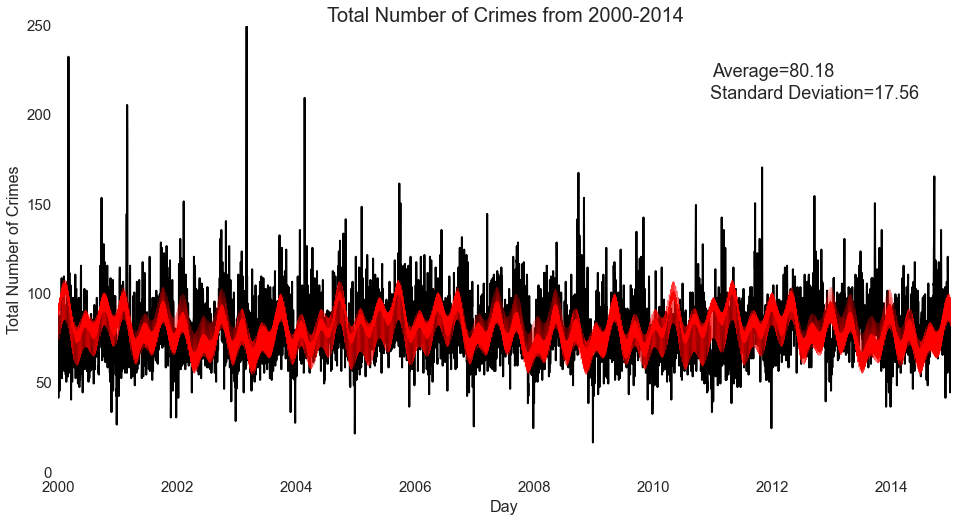

In [740]:
figure = plt.figure(figsize=(16,8))
TSPlot = byDay.plot(linewidth=2, c='black')
wave1.plot(linewidth=.4,c='red')

TSPlot.set_ylabel('Total Number of Crimes', fontsize=16)
TSPlot.set_xlabel('Day',fontsize=16)
TSPlot.set_title('Total Number of Crimes from 2000-2014',fontsize=20)
plt.tick_params(axis='both', labelsize=15)

#### ADD STATISTICS TEXT####
TSPlot.text(0.8, 0.9,'Average=%.2f' %mean, ha='center', va='center', transform=TSPlot.transAxes, fontsize = 18)
TSPlot.text(0.8465, 0.85,'Standard Deviation=%.2f' %std, ha='center', va='center', transform=TSPlot.transAxes, fontsize = 18);

In [741]:
def calc_resid(obs,pred):
    return obs-pred

In [742]:
for i in range(len(waveDF)):
    waveDF['byDay'][i] = byDay[i]

In [743]:
SSE = np.sum((waveDF['byDay']-waveDF['agWave'])**2)
meanTheta = np.mean(waveDF['byDay'])
SSM = np.sum((waveDF['agWave']-meanTheta)**2)
SST = SSM + SSE
rsquare = 1-(SSE/SST)
print(SSE,SSM,SST,rsquare)

(37378461.6215185, 35849979.243038066, 73228440.864556566, 0.48956360151578593)


In [744]:
waveDF['Residuals']= waveDF.apply(lambda row: calc_resid(row['agWave'],row['byDay']), axis=1)

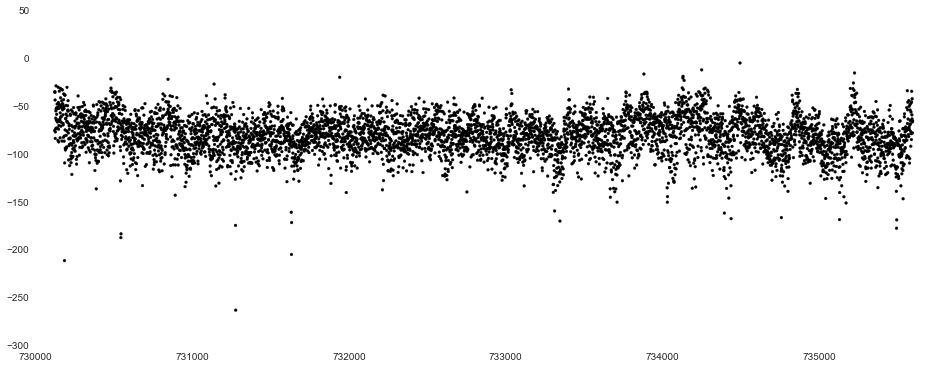

In [745]:
fig = plt.figure(figsize=(16,6))
residPlt = plt.scatter(waveDF['time'],waveDF['Residuals'], s=8, c='black')

plt.xlim(730000,735700);

# Total Crime/Day, by Zone 

In [11]:
z1 = crimeData.query('location == 1')
z2 = crimeData.query('location == 2')
z3 = crimeData.query('location == 3')

In [12]:
print('Total crime for zone 1:',len(z1));print('Total crime for zone 2:',len(z2));print('Total crime for zone 3:',(len(z3)))

('Total crime for zone 1:', 167318)
('Total crime for zone 2:', 176247)
('Total crime for zone 3:', 75107)


In [13]:
z1 = z1.reset_index();
z2 = z2.reset_index();
z3 = z3.reset_index();

In [14]:
del z1['index']
del z2['index']
del z3['index']

In [15]:
z1TS = pd.Series(z1['location'],index=z1['When Reported'])
z1TS[0:] = 1

z2TS = pd.Series(z1['location'],index=z2['When Reported'])
z2TS[0:] = 1

z3TS = pd.Series(z1['location'],index=z3['When Reported'])
z3TS[0:] = 1

In [16]:
z1TS = z1TS.resample('D',how='sum')
z2TS = z2TS.resample('D',how='sum')
z3TS = z3TS.resample('D',how='sum')

In [17]:
z1mean = round(np.mean(z1TS),2)
z1std = round(np.std(z1TS),2)

z2mean = round(np.mean(z2TS),2)
z2std = round(np.std(z2TS),2)

z3mean = round(np.mean(z3TS),2)
z3std = round(np.std(z3TS),2)

## Crime by Zone: Visualization

In [18]:
from matplotlib.gridspec import GridSpec

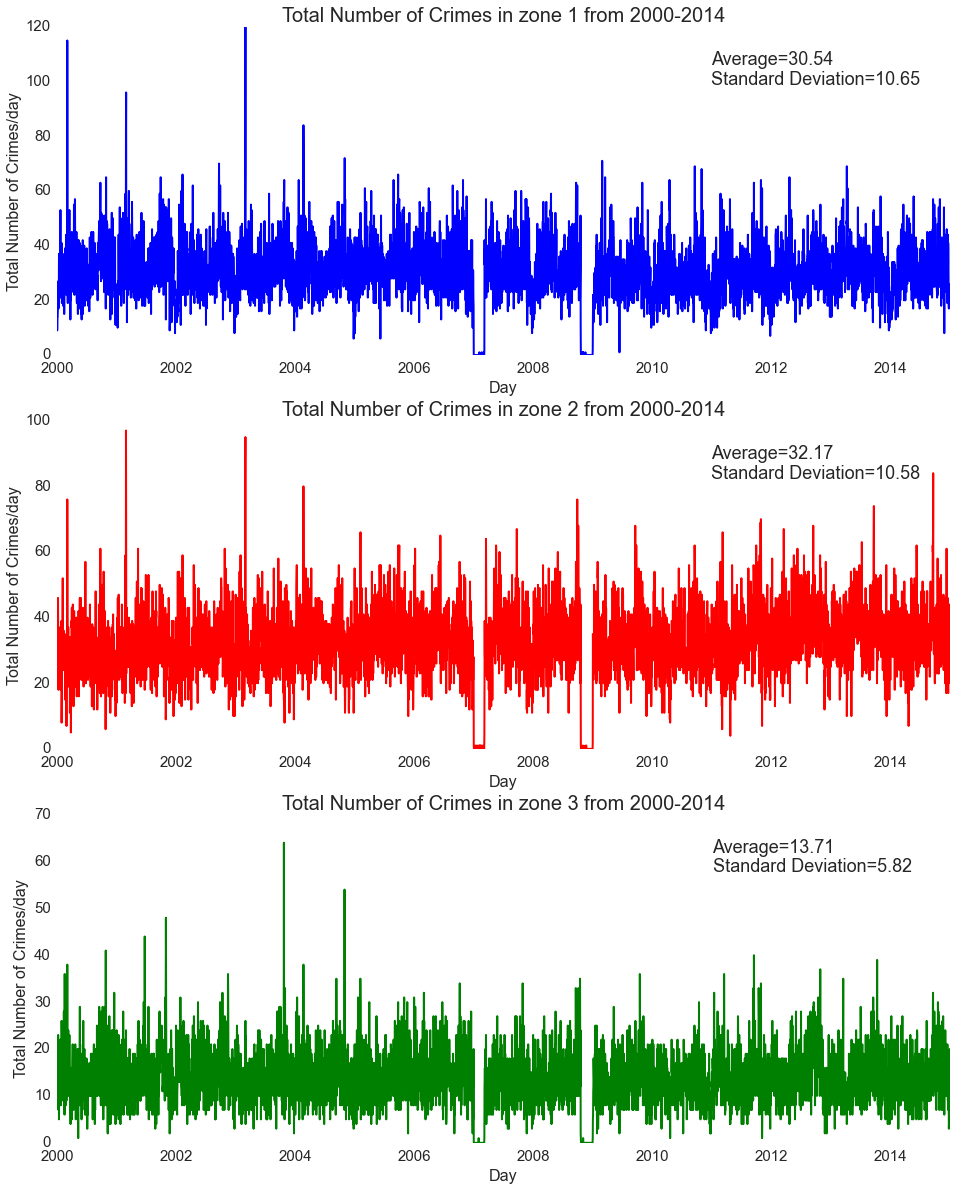

In [32]:
figure = plt.figure(figsize=(16,20))
gs = GridSpec(3,1)

z1plot = figure.add_subplot(gs[0,0])
z1plot =z1TS.plot(linewidth=2, c='blue')
z1plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z1plot.set_xlabel('Day',fontsize=16)
z1plot.set_title('Total Number of Crimes in zone 1 from 2000-2014',fontsize=20)
z1plot.tick_params(axis='both', labelsize=15)
z1plot.text(0.8, 0.9,'Average=%.2f' %z1mean, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18)
z1plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z1std, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18);

z2plot = figure.add_subplot(gs[1,0])
z2plot = z2TS.plot(linewidth=2, c='red')
z2plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z2plot.set_xlabel('Day',fontsize=16)
z2plot.set_title('Total Number of Crimes in zone 2 from 2000-2014',fontsize=20)
z2plot.tick_params(axis='both', labelsize=15)
z2plot.text(0.8, 0.9,'Average=%.2f' %z2mean, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18)
z2plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z2std, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18);

z3plot = figure.add_subplot(gs[2,0])
z3plot = z3TS.plot(linewidth=2, c='green')
z3plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z3plot.set_xlabel('Day',fontsize=16)
z3plot.set_title('Total Number of Crimes in zone 3 from 2000-2014',fontsize=20)
z3plot.tick_params(axis='both', labelsize=15)
z3plot.text(0.8, 0.9,'Average=%.2f' %z3mean, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18)
z3plot.text(0.846, 0.84,'Standard Deviation=%.2f' %z3std, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18);

##Crime by Zone: Harmonic Model 